In [1]:
pip install beautifulsoup4

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install folium==0.5.0

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 9.8 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=1ce77d5148aa3ac77ef783e779eb2dded48b4752996bbb84b116d2e298ab2c35
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install geocoder

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 7.6 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install geopandas

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 994 kB 14.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 36.1 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 19.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.6 MB 24.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install shapely

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [6]:
import requests
import lxml.html as lh
import bs4 as bs
import urllib.request
import numpy as np 
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium # plotting library

In [7]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
res = requests.get(url)
soup = bs.BeautifulSoup(res.content,'lxml')
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)
print(table_contents)
df = pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

[{'PostCode': 'M3A', 'Borough': 'North York', 'Neighborhood': 'Parkwoods'}, {'PostCode': 'M4A', 'Borough': 'North York', 'Neighborhood': 'Victoria Village'}, {'PostCode': 'M5A', 'Borough': 'Downtown Toronto', 'Neighborhood': 'Regent Park, Harbourfront'}, {'PostCode': 'M6A', 'Borough': 'North York', 'Neighborhood': 'Lawrence Manor, Lawrence Heights'}, {'PostCode': 'M7A', 'Borough': "Queen's Park", 'Neighborhood': 'Ontario Provincial Government'}, {'PostCode': 'M9A', 'Borough': 'Etobicoke', 'Neighborhood': 'Islington Avenue'}, {'PostCode': 'M1B', 'Borough': 'Scarborough', 'Neighborhood': 'Malvern, Rouge'}, {'PostCode': 'M3B', 'Borough': 'North York', 'Neighborhood': 'Don Mills North'}, {'PostCode': 'M4B', 'Borough': 'East York', 'Neighborhood': 'Parkview Hill, Woodbine Gardens'}, {'PostCode': 'M5B', 'Borough': 'Downtown Toronto', 'Neighborhood': 'Garden District, Ryerson'}, {'PostCode': 'M6B', 'Borough': 'North York', 'Neighborhood': 'Glencairn'}, {'PostCode': 'M9B', 'Borough': 'Etobicok

In [8]:
#First 5 records
df.head()

,PostCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


## Q2_geospatial

In [ ]:
geospatial_url = "https://cocl.us/Geospatial_data"
geospatial_data = pd.read_csv(geospatial_url)

In [10]:
geospatial_data.columns = ['PostCode', 'Latitude', 'Longitude']

In [11]:
geospatial_data.head()

,PostCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
merged_data = pd.merge(df, geospatial_data, on='PostCode')

In [13]:
merged_data.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [14]:
merged_data['Coordinates'] = list(zip(merged_data['Latitude'], merged_data['Longitude']))

In [15]:
merged_data.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Coordinates
0,M3A,North York,Parkwoods,43.753259,-79.329656,"(43.7532586, -79.3296565)"
1,M4A,North York,Victoria Village,43.725882,-79.315572,"(43.725882299999995, -79.31557159999998)"
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,"(43.6542599, -79.3606359)"
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,"(43.718517999999996, -79.46476329999999)"
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,"(43.6623015, -79.3894938)"


In [16]:
merged_data['Coordinates'] = merged_data['Coordinates'].apply(Point)

In [17]:
gdf = gpd.GeoDataFrame(merged_data, geometry='Coordinates')

In [18]:
gdf.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Coordinates
0,M3A,North York,Parkwoods,43.753259,-79.329656,POINT (43.75326 -79.32966)
1,M4A,North York,Victoria Village,43.725882,-79.315572,POINT (43.72588 -79.31557)
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,POINT (43.65426 -79.36064)
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,POINT (43.71852 -79.46476)
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,POINT (43.66230 -79.38949)


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


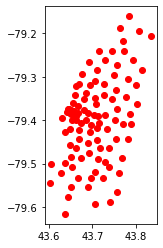

In [19]:

# set up map
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='green', edgecolor='black')
# plot and show
gdf.plot(ax=ax, color='red')

plt.show()

In [20]:
latitude = 43.653908
longitude = -79.384293
map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco
# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ecco',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(map)
# add popular spots to the map as blue circle markers
for lat, lng, label in zip(merged_data.Latitude, merged_data.Longitude, merged_data.Neighborhood):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(map)
# display map
map